# Weather vs Latitude Analysis
An analysis of how various weather elements vary as a function of latitude. The analysis is done by generating a random selection of cities with varying latitude using citipy library and then pulling current weather for those cities using the openweathermap api. The weather factors are then plotted versus latitude to look for correlations.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

## Perform API Calls

In [3]:
# Save config information

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"


In [4]:
# set up lists to hold reponse info
cities_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    params = {
        'appid' : api_key,
        'q' : city,
        'units' : 'imperial'
    }

    response = requests.get(url, params=params).json()
    
    if response['cod'] == 200:
        cities_found.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])


# Dataframe of Weather Data by City

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities_found,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,jamestown,12,AU,1535249646,50,-33.21,138.60,61.28,7.20
1,albany,75,US,1535248260,61,42.65,-73.75,71.60,8.05
2,punta arenas,75,CL,1535245200,86,-53.16,-70.91,37.40,4.70
3,yellowknife,75,CA,1535245200,62,62.45,-114.38,53.60,8.05
4,itarema,0,BR,1535249805,86,-2.92,-39.92,76.94,14.25


In [6]:
# check to see if we have enough datapoints
len(weather_data)

553

# Latitude vs. Max Temperature Plot

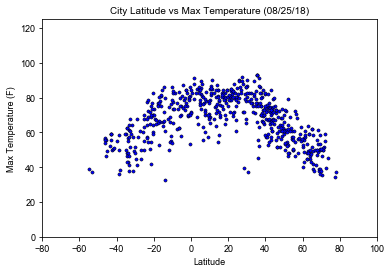

In [7]:
# create scatter plot of max temp versus latitude
axes = weather_data.plot(kind='scatter', x='Lat', y='Max Temp', s = 10, color='blue', edgecolors = "black", linewidth=.5)

# set axis limits
axes.set_ylim((-0,125))
axes.set_xlim((-80,100))

# set text labels
axes.set_title("City Latitude vs Max Temperature (08/25/18)", fontsize = 10)
axes.set_xlabel("Latitude", fontsize = 9)
axes.set_ylabel("Max Temperature (F)", fontsize = 9)
axes.tick_params(axis='both', labelsize= 9)

# specify formats
sns.set()

# Save the figure
fig = axes.get_figure()
fig.savefig("MaxTempvsLat.png")


### Observations from Latitude versus Max Temperature Plot

The chart above illustrates a basic truth about global geography: Earth has much more land mass in the northern latitudes than in the southern latitudes. This is evidenced by the number of datapoints that I was able ot extract for the two regions. There are many datapoints above 60 degrees north, but very few below -60 degrees south.

Regarding max temperature, the chart above shows what would be expected: max tempertures are higher at the equator than it is closer to the poles. By looking at equivalent latitudes (ex -40, +40), the fact that it is summer in the northern hemisphere and winter in the southern hemiphere.


# Latitude vs. Humidity Plot

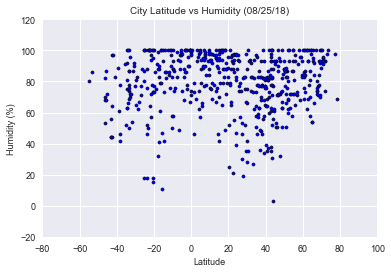

In [8]:
# create scatter plot of humidity versus latitude
axes = weather_data.plot(kind='scatter', x='Lat', y='Humidity', s = 10, color='blue', edgecolors = "black", linewidth=.5)

# set axis limits
axes.set_ylim((-20,120))
axes.set_xlim((-80,100))

# set text labels
axes.set_title("City Latitude vs Humidity (08/25/18)", fontsize = 10)
axes.set_xlabel("Latitude", fontsize = 9)
axes.set_ylabel("Humidity (%)", fontsize = 9)
axes.tick_params(axis='both', labelsize= 9)

# specify formats
sns.set()

# Save the figure
fig = axes.get_figure()
fig.savefig("HumidityvsLat.png")


### Observations from Latitude versus Humidity Plot

The Latitude vs Humidty plot primarily illustrates that there is a broad range of humidity at all latitudes with 40% to 100% being found in most latitudes. This dataset does see to show that there are fewer low humidity data points at the equator and the poles with the middle latitudes displaying the lowest humidity data points.

# Latitude vs. Cloudiness Plot

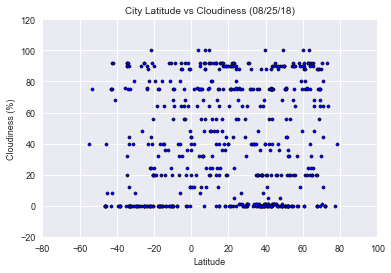

In [9]:
# create scatter plot of cloudiness versus latitude
axes = weather_data.plot(kind='scatter', x='Lat', y='Cloudiness', s = 10, color='blue', edgecolors = "black", linewidth=.5)

# set axis limits
axes.set_ylim((-20,120))
axes.set_xlim((-80,100))

# set text labels
axes.set_title("City Latitude vs Cloudiness (08/25/18)", fontsize = 10)
axes.set_xlabel("Latitude", fontsize = 9)
axes.set_ylabel("Cloudiness (%)", fontsize = 9)
axes.tick_params(axis='both', labelsize= 9)

# specify formats
sns.set()

# Save the figure
fig = axes.get_figure()
fig.savefig("CloudinessvsLat.png")


### Observations from Latitude versus Cloudiness Plot

The plot of Latitude versus Cloudiness, shows little discernable trends across latitudes. Across all latitudes, more datapoints are showing 0 cloudiness than any other level.

# Latitude vs. Wind Speed Plot

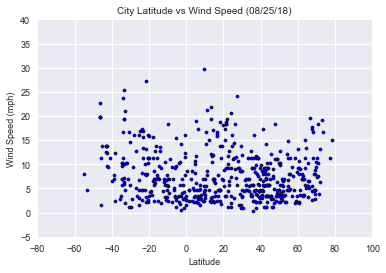

In [10]:
# create scatter plot of windspeed versus latitude
axes = weather_data.plot(kind='scatter', x='Lat', y='Wind Speed', s = 10, color='blue', edgecolors = "black", linewidth=.5)

# set axis limits
axes.set_ylim((-5,40))
axes.set_xlim((-80,100))

# set text labels
axes.set_title("City Latitude vs Wind Speed (08/25/18)", fontsize = 10)
axes.set_xlabel("Latitude", fontsize = 9)
axes.set_ylabel("Wind Speed (mph)", fontsize = 9)
axes.tick_params(axis='both', labelsize= 9)

# specify formats
sns.set()

# Save the figure
fig = axes.get_figure()
fig.savefig("WindspeedvsLat.png")


### Observations from Latitude versus Wind Speed Plot

The chart above does not show strong trends in wind speed across latitudes. It does appear that there are more extreme wind speeds near the poles than close to the equator. However, the trend is slight enough that statistical analysis would be required to determine if the trend is significant.